# Exploratory Data Analysis
Adapted from https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/2-Exploratory-Data-Analysis.ipynb

In [1]:
#Get the Document Term Matrix created in the last part

import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,William Wordsworth,Samuel Taylor Coleridge,Anna Laetitia Barbauld,Mary Wollstonecraft,Percy Bysshe Shelley,Christina Rossetti,"Alfred, Lord Tennyson",Robert Browning,Elizabeth Barrett Browning,Rudyard Kipling,Virginia Woolf,W. B. Yeats,T. S. Eliot,James Joyce,Claude McKay,Daljit Nagra,Grace Nichols,Seamus Heaney,Derek Walcott,Zadie Smith
abandon,0,1,2,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
abandoned,0,1,0,0,3,0,0,1,0,0,1,0,0,5,0,0,0,0,0,0
abandonment,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
abbey,3,1,0,0,1,0,2,1,0,2,0,5,1,0,0,0,0,0,0,0
ability,0,0,0,2,0,0,0,1,0,1,0,0,2,0,0,0,0,0,2,0


## Add stopwords
Using a standard package (the, and, etc.) and adding out own terms based on the data

In [2]:
# Find the top 30 words in each
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30) #Can change number of words
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'William Wordsworth': [('wordsworth', 104),
  ('william', 39),
  ('william wordsworth', 23),
  ('coleridge', 19),
  ('year', 17),
  ('poems', 14),
  ('dorothy', 13),
  ('death', 13),
  ('works', 13),
  ('mary', 12),
  ('work', 11),
  ('published', 11),
  ('cambridge', 10),
  ('poem', 10),
  ('university', 10),
  ('years', 10),
  ('poet', 10),
  ('following', 9),
  ('john', 9),
  ('life', 8),
  ('children', 7),
  ('died', 7),
  ('university press', 7),
  ('england', 7),
  ('press', 7),
  ('biography', 7),
  ('romantic', 6),
  ('later', 6),
  ('isbn', 6),
  ('april', 6)],
 'Samuel Taylor Coleridge': [('coleridge', 188),
  ('poems', 32),
  ('wordsworth', 19),
  ('samuel', 19),
  ('poetry', 18),
  ('work', 16),
  ('taylor', 16),
  ('london', 16),
  ('samuel taylor', 16),
  ('taylor coleridge', 16),
  ('university', 15),
  ('literary', 14),
  ('vols', 13),
  ('rime', 13),
  ('john', 13),
  ('philosophy', 13),
  ('cambridge', 12),
  ('works', 12),
  ('conversation', 12),
  ('church', 12),
 

In [3]:
# Print the top 15 words in each article
for article, top_words in top_dict.items():
    print(article)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

William Wordsworth
wordsworth, william, william wordsworth, coleridge, year, poems, dorothy, death, works, mary, work, published, cambridge, poem
---
Samuel Taylor Coleridge
coleridge, poems, wordsworth, samuel, poetry, work, taylor, london, samuel taylor, taylor coleridge, university, literary, vols, rime
---
Anna Laetitia Barbauld
children, anna, women, literary, london, william, century, press, johnson, prose, works, time, literature, university
---
Mary Wollstonecraft
wollstonecraft, mary, women, woman, mary wollstonecraft, rights, isbn, london, johnson, life, rights woman, godwin, revolution, cambridge
---
Percy Bysshe Shelley
shelley, mary, percy, byron, harriet, godwin, john, daughter, political, wrote, poem, son, poets, death
---
Christina Rossetti
rossetti, london, poems, poem, work, poetry, library, later, family, william, london macmillan, mother, poet, dante
---
Alfred, Lord Tennyson
tennyson, poems, alfred, break, poetry, works, cambridge, published, poets, family, later, 

# Time to make a decision based on content knowledge

Add additional stopwords, based on what don't seem to be meaningful terms

In [4]:
from collections import Counter

# Let's first pull out the top 30 words for each article, and how many articles they appear in
words = []
for article in data.columns:
    top = [word for (word, count) in top_dict[article]]
    for t in top:
        words.append(t)
        
Counter(words).most_common()

[('poems', 15),
 ('published', 14),
 ('work', 13),
 ('poem', 13),
 ('life', 13),
 ('poetry', 13),
 ('london', 12),
 ('poet', 11),
 ('later', 11),
 ('university', 10),
 ('time', 10),
 ('works', 9),
 ('wrote', 9),
 ('death', 8),
 ('john', 8),
 ('english', 8),
 ('family', 8),
 ('book', 8),
 ('years', 7),
 ('press', 6),
 ('father', 6),
 ('poets', 6),
 ('new', 6),
 ('william', 5),
 ('cambridge', 5),
 ('literary', 5),
 ('literature', 5),
 ('novel', 5),
 ('home', 5),
 ('award', 5),
 ('prize', 5),
 ('year', 4),
 ('mary', 4),
 ('isbn', 4),
 ('woman', 4),
 ('collection', 4),
 ('irish', 4),
 ('children', 3),
 ('robert', 3),
 ('women', 3),
 ('school', 3),
 ('letters', 3),
 ('british', 3),
 ('long', 3),
 ('world', 3),
 ('writing', 3),
 ('ireland', 3),
 ('new york', 3),
 ('york', 3),
 ('won', 3),
 ('books', 3),
 ('wordsworth', 2),
 ('coleridge', 2),
 ('died', 2),
 ('england', 2),
 ('romantic', 2),
 ('church', 2),
 ('johnson', 2),
 ('child', 2),
 ('writers', 2),
 ('godwin', 2),
 ('ed', 2),
 ('son', 2

## My choice: anything on 7 or more pages

In [5]:
# Decide what to exclude from list: e.g., if all, or over half, have the same words
add_stop_words = [word for word, count in Counter(words).most_common() if count >= 7]
add_stop_words

['poems',
 'published',
 'work',
 'poem',
 'life',
 'poetry',
 'london',
 'poet',
 'later',
 'university',
 'time',
 'works',
 'wrote',
 'death',
 'john',
 'english',
 'family',
 'book',
 'years']

In [7]:
# Update document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

## Make a Word Cloud

In [8]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [9]:
#Create a list of page titles, taken from the corpus file created when data cleaning

df = pd.read_pickle('corpus.pkl')

article_titles = []
for i in range(df['Page_Title'].count()):
    article_titles.append(df.iloc[i,1])

### Note:

If using your own data make sure to edit the row marked below to get the ride matrix size

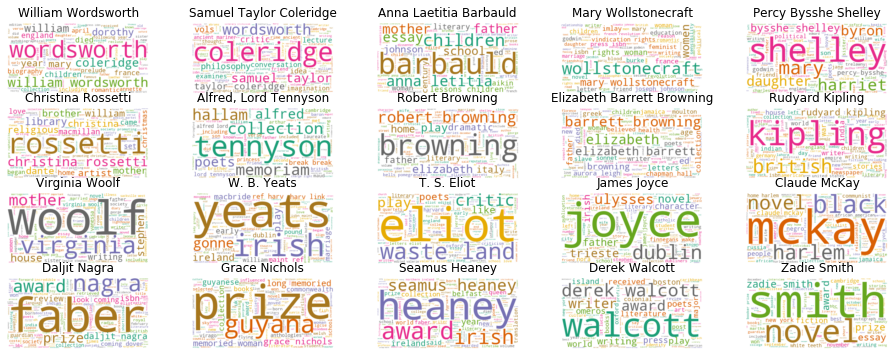

In [18]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each Wikipedia page
for index, article in enumerate(data.columns):
    wc.gen
    erate(data_clean.Text[article])
    
    plt.subplot(4, 5, index+1) #Edit this: rows/columns of word clouds depend on number of pages 
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(article_titles[index])
    
plt.show()

# Interesting Results?

- **Nagra's Publisher (but not Heaney or Walcott)** All three were published by Faber and Faber, and T. S. Eliot was the long-time editor.

- **Ethnicity and identity:** Walcott and Nagra; McKay and Nichols

- **Who is Irish?** Yeats and Heaney, but not Joyce?


## Additional step
Add in the names as stopwords (lowercase), re-create the data, and then create the wordclouds again

In [27]:
Names = ['william', 'wordsworth', 'samuel', 'taylor', 'coleridge', 'anna', 'barbauld', 'mary', 'wollstonecraft', 
         'percy', 'shelley', 'christina', 'rossetti', 'alfred', 'tennyson', 'robert', 'browning', 'elizabeth',
         'barrett', 'browning', 'rudyard', 'kipling', 'virginia', 'woolf', 'yeats', 'eliot',
         'james', 'joyce', 'claude', 'mckay', 'daljit', 'nagra', 'grace', 'nichols', 'seamus', 'heaney',
         'derek', 'walcott', 'zadie', 'smith']

stop_words = stop_words.union(Names)

In [29]:
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

'''OPTIONAL: Pickle it for later use (I won't do this, so that we keep the original, with the names)
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")'''

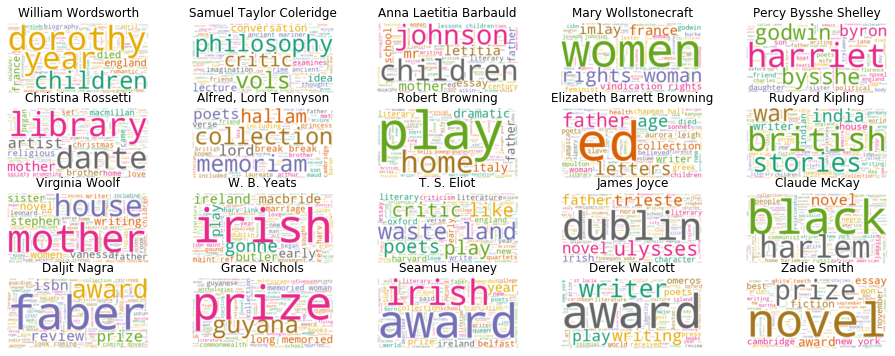

In [30]:
#redo the word clouds (all pasted from above, but now the )

from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each comedian
for index, article in enumerate(data.columns):
    wc.generate(data_clean.Text[article])
    
    plt.subplot(4, 5, index+1) #Edit this: rows/columns of word clouds depend on number of pages 
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(article_titles[index])
    
plt.show()

## Interesting results?
- **Prizes and awards** All give post-World War II writers (Nagra, Nichols, Heaney, Walcott, Smith)
- **More?** Identity, friends and relatives, etc.

# Next step: Word Frequency
How many unique words in each article?

**Note:** This is very skewed because the pages are such different sizes

In [31]:
#Unique words
unique_list = []
for article in data.columns:
    uniques = data[article].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

#Total words
total_list = []
for article in data.columns:
    totals = sum(data[article])
    total_list.append(totals)

#Percentage of unique words
percent_list = []
for i in range(len(unique_list)):
    percent_list.append(float(unique_list[i]/total_list[i]*100))

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(article_titles, unique_list, total_list, percent_list)), columns=['article', 'unique_words', 'total_words', 'percent_unique'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,article,unique_words,total_words,percent_unique
16,Grace Nichols,143,217,65.898618
15,Daljit Nagra,217,363,59.779614
19,Zadie Smith,434,858,50.582751
5,Christina Rossetti,536,917,58.451472
6,"Alfred, Lord Tennyson",743,1416,52.471751
0,William Wordsworth,754,1515,49.768977
18,Derek Walcott,787,1503,52.361943
14,Claude McKay,865,1688,51.244076
8,Elizabeth Barrett Browning,939,2068,45.406190
17,Seamus Heaney,949,2280,41.622807


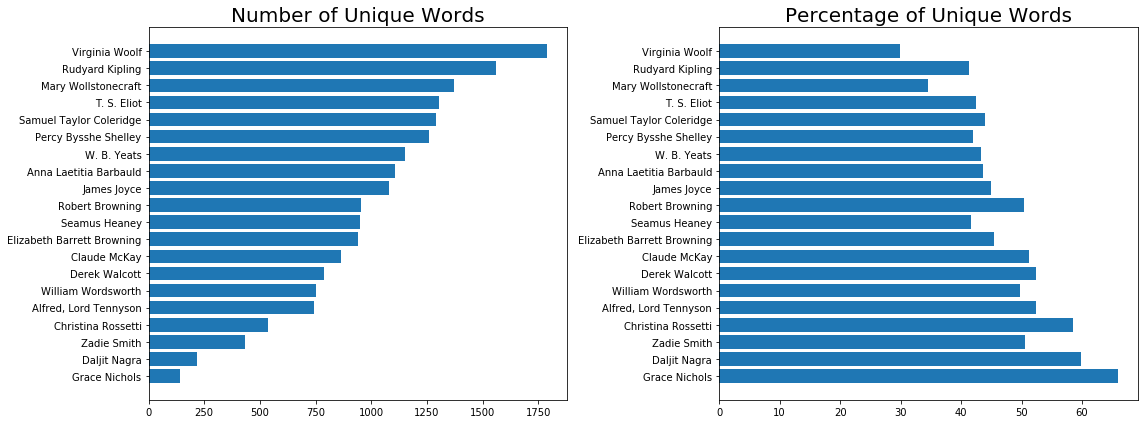

In [32]:
#A bar plot of findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.article)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_unique_sort.percent_unique, align='center')
plt.yticks(y_pos, data_unique_sort.article)
plt.title('Percentage of Unique Words', fontsize=20)

plt.tight_layout()
plt.show()

# Scatter plot
This is worth doing only if there are particular words, and we want to see them on a scatter plot

In [33]:
# Look at the most common words, and choose any worth looking at
Counter(words).most_common()

[('poems', 15),
 ('published', 14),
 ('work', 13),
 ('poem', 13),
 ('life', 13),
 ('poetry', 13),
 ('london', 12),
 ('poet', 11),
 ('later', 11),
 ('university', 10),
 ('time', 10),
 ('works', 9),
 ('wrote', 9),
 ('death', 8),
 ('john', 8),
 ('english', 8),
 ('family', 8),
 ('book', 8),
 ('years', 7),
 ('press', 6),
 ('father', 6),
 ('poets', 6),
 ('new', 6),
 ('william', 5),
 ('cambridge', 5),
 ('literary', 5),
 ('literature', 5),
 ('novel', 5),
 ('home', 5),
 ('award', 5),
 ('prize', 5),
 ('year', 4),
 ('mary', 4),
 ('isbn', 4),
 ('woman', 4),
 ('collection', 4),
 ('irish', 4),
 ('children', 3),
 ('robert', 3),
 ('women', 3),
 ('school', 3),
 ('letters', 3),
 ('british', 3),
 ('long', 3),
 ('world', 3),
 ('writing', 3),
 ('ireland', 3),
 ('new york', 3),
 ('york', 3),
 ('won', 3),
 ('books', 3),
 ('wordsworth', 2),
 ('coleridge', 2),
 ('died', 2),
 ('england', 2),
 ('romantic', 2),
 ('church', 2),
 ('johnson', 2),
 ('child', 2),
 ('writers', 2),
 ('godwin', 2),
 ('ed', 2),
 ('son', 2

## "London" vs "English"

Is the writer in a local, London context? Or globally an English writer/

In [36]:
#Isolate any interesting words
data_interesting_words = data.transpose()[['london', 'english']]

#If more than two words, add them here
data_interesting = pd.concat([data_interesting_words.london, data_interesting_words.english], axis=1)

data_interesting.columns = ['london', 'english']
data_interesting

,london,english
William Wordsworth,4,3
Samuel Taylor Coleridge,16,10
Anna Laetitia Barbauld,22,5
Mary Wollstonecraft,33,2
Percy Bysshe Shelley,9,4
Christina Rossetti,18,4
"Alfred, Lord Tennyson",5,4
Robert Browning,12,2
Elizabeth Barrett Browning,24,7
Rudyard Kipling,18,18


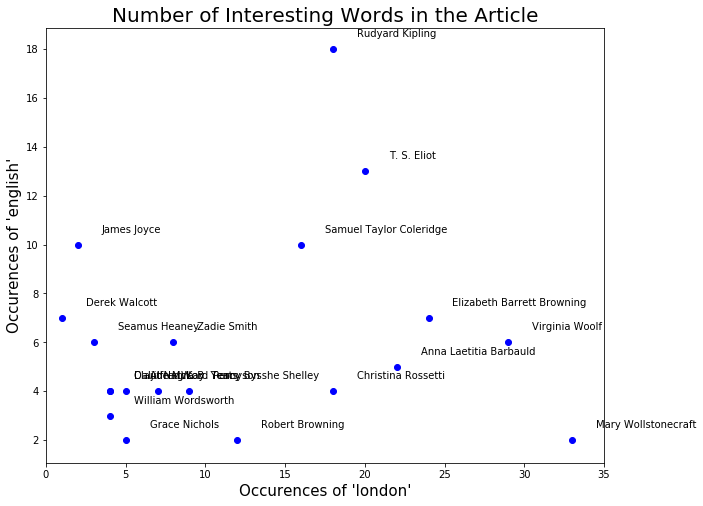

In [40]:
# A scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, article in enumerate(data_interesting.index):
    x = data_interesting.london.loc[article]
    y = data_interesting.english.loc[article]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, article_titles[i], fontsize=10)
    plt.xlim(0, 35) 
    
plt.title('Number of Interesting Words in the Article', fontsize=20)
plt.xlabel('Occurences of \'london\'', fontsize=15)
plt.ylabel('Occurences of \'english\'', fontsize=15)

plt.show()

# Interesting results?

- **Wollstonecraft** the most local; **Virginia Woolf** but not **Zadie Smith**
- **Low instances of London:** Wordsworth; and Walcott, Heaney, Joyce, Nichols

# Takeaway
The data makes sense, and raises some interseting questions that might be useful to start discussion in class.

**Exam Review**: these visualizations can remind students about some of the authors from the syllabus